In [1]:
# Nice to have and only here as a reference until moved to its instructional home :)
#export CUDNN_PATH=$(dirname $(python -c "import nvidia.cudnn; print(nvidia.cudnn.__file__)"))
#export SITE_PACKAGES_PATH=$(python -c "import site; print(site.getsitepackages()[0])")
#export LD_LIBRARY_PATH=$CUDNN_PATH/lib:$SITE_PACKAGES_PATH/tensorrt_libs/:$LD_LIBRARY_PATH

In [2]:
!conda list

# packages in environment at /home/flaniganp/mambaforge/envs/tensorflow-exercise-5:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
absl-py                   2.1.0                    pypi_0    pypi
anyio                     4.3.0                    pypi_0    pypi
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
babel                     2.14.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
bleach                    6.1.0          

In [25]:
# Daily Minimum Temperatures Dataset
# Contains daily minimum temperatures from January 1981 to December 1990.

# * keras.layers: This component of Keras provides a wide array of layers for building neural networks, including
#   convolutional layers, pooling layers, dense (fully connected) layers, and more. These layers are the building blocks
#   of neural networks and can be stacked to create complex architectures tailored to specific machine learning tasks.
from keras import layers

# * keras.models: This module in Keras is essential for creating neural network models. It includes classes like
#   Sequential and the Functional API for building models. The Sequential model is straightforward, allowing layers to
#   be added in sequence, suitable for simple architectures. The Functional API, on the other hand, provides greater
#   flexibility for creating complex models with advanced features like shared layers and multiple inputs/outputs.
#   Both types enable comprehensive model management, including training, evaluation, and saving/loading
#   functionalities, making them versatile for a wide range of deep learning applications.
from keras import models

# Import the Matplotlib library's pyplot module as 'plt' to enable data visualization through various types of plots
# and charts, providing a MATLAB-like plotting framework for creating static, interactive, and animated visualizations
# in Python.
import matplotlib.pyplot as plt

# * numpy.array is used to import the array function from the NumPy library, but it renames it as np_array for use
# within the code. This function is crucial in NumPy for creating array objects, which are central to the library's
# operations. These arrays are multi-dimensional, efficient, and provide the foundation for a wide range of scientific
# computing and data manipulation tasks in Python. Renaming it to np_array can help avoid naming conflicts or simply
# provide a shorthand that's more convenient for the coder's preferences.
from numpy import array as np_array

# The statement `import numpy as np` is a convenient way to access all the powerful features of the NumPy library using 
# the shorthand `np`. NumPy is essential for scientific computing in Python, providing support for large, multi-dimensional
# arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
# Using `np` as an abbreviation allows for more concise code, especially when dealing with complex mathematical operations 
# and data manipulation tasks.
import numpy as np

# The os module in Python provides a way of using operating system dependent functionality. It allows you to interface
# with the underlying operating system that Python is running on – be it Windows, Mac or Linux. You can use the os module
# to handle file and directory paths, create folders, list contents of a directory, manage environment variables, execute
# shell commands, and more.
import os

# Import the `read_csv` function from pandas for loading and parsing CSV files into DataFrame objects,
# facilitating data manipulation and analysis.
from pandas import read_csv

# Regular Expressions
# 1. search: This function is used to perform a search for a pattern in a string and returns a match object if the
# pattern is found, otherwise None. It's particularly useful for string pattern matching and extracting specific
# segments from text.
from re import search

# Import the `data` module from TensorFlow to utilize efficient data loading, preprocessing,
# and iteration tools for handling datasets, enabling optimized data pipelines for model training and evaluation.
from tensorflow import data

# Import the `load_model` function from Keras to enable loading a pre-trained model from a file,
# allowing for model evaluation, further training, or inference without needing to redefine the model architecture.
from keras.models import load_model

# Key aspects of 'check_output':
# 1. **Process Execution**: The 'check_output' function is used to run a command in the subprocess/external process and
#    capture its output. This is especially useful for running system commands and capturing their output directly
#    within a Python script.
# 2. **Return Output**: It returns the output of the command, making it available to the Python environment. If the
#    called command results in an error (non-zero exit status), it raises a CalledProcessError.
# 3. **Use Cases**: Common use cases include executing a shell command, reading the output of a command, automating
#    scripts that interact with the command line, and integrating external tools into a Python workflow.
# Example Usage:
# Suppose you want to capture the output of the 'ls' command in a Unix/Linux system. You can use 'check_output' like
# this:
# output = check_output(['ls', '-l'])
from subprocess import check_output
# Key aspects of 'CalledProcessError':
#  1. Error Handling: CalledProcessError is an exception raised by check_output when the command it tries to execute
#   returns a non-zero exit status, indicating failure. This exception is particularly useful for error handling in
#   scripts where the success of an external command is crucial.
#  2. Exception Details: The exception object contains information about the error, including the return code, command
#  executed, and output (if any). This aids in debugging by providing clear insights into why the external command
#  failed.
#  3. Handling the Exception: In practical use, it is often caught in a try-except block, allowing the script to respond
#  appropriately to the failure of the external command, like logging the error or trying a fallback operation.
from subprocess import CalledProcessError

# * tensorflow.python.client: Provides functionalities to query the properties of the hardware devices TensorFlow can
#   access. Specifically, this module is often used to list and get detailed information about the system's available
#   CPUs, GPUs, and other hardware accelerators compatible with TensorFlow.
from tensorflow.python.client import device_lib

# TensorFlow Lite provides tools and classes for converting TensorFlow models into a highly optimized format suitable
# for deployment on mobile devices, embedded systems, or other platforms with limited computational capacity. This
# module includes functionalities for model conversion, optimization, and inference. By importing `lite`, you gain
# access to the TFLiteConverter class for model conversion, optimization options like quantization, and utilities for
# running TFLite models on target devices.
from tensorflow import lite

# Versioning sourcing
from tensorflow import __version__ as tf_version

In [4]:
# TensorFlow. For each device identified as a GPU, the function extracts and prints relevant details including the GPU's
# ID, name, memory limit (converted to megabytes), and compute capability. The extraction of GPU information involves
# parsing the device's description string using regular expressions to find specific pieces of information. This
# function can be particularly useful for debugging or for setting up configurations in environments with multiple GPUs,
# ensuring that TensorFlow is utilizing the GPUs as expected.

def print_gpu_info():
    # Undocumented Method
    # https://stackoverflow.com/questions/38559755/how-to-get-current-available-gpus-in-tensorflow
    # Get the list of all devices
    devices = device_lib.list_local_devices()

    for device in devices:
        if device.device_type == 'GPU':
            # Extract the physical device description
            desc = device.physical_device_desc

            # Use regular expressions to extract the required information
            gpu_id_match = search(r'device: (\d+)', desc)
            name_match = search(r'name: (.*?),', desc)
            compute_capability_match = search(r'compute capability: (\d+\.\d+)', desc)

            if gpu_id_match and name_match and compute_capability_match:
                gpu_id = gpu_id_match.group(1)
                gpu_name = name_match.group(1)
                compute_capability = compute_capability_match.group(1)

                # Convert memory limit from bytes to gigabytes and round it
                memory_limit_gb = round(device.memory_limit / (1024 ** 2))

                print(
                    f"\tGPU ID {gpu_id} --> {gpu_name} --> "
                    f"Memory Limit {memory_limit_gb} MB --> "
                    f"Compute Capability {compute_capability}")

In [5]:
# NVIDIA Driver
try:
    # Execute the nvidia-smi command and decode the output
    nvidia_smi_output = check_output("nvidia-smi", shell=True).decode()

    # Split the output into lines
    lines = nvidia_smi_output.split('\n')

    # Find the line containing the driver version
    driver_line = next((line for line in lines if "Driver Version" in line), None)

    # Extract the driver version number
    if driver_line:
        driver_version = driver_line.split('Driver Version: ')[1].split()[0]
        print("NVIDIA Driver:", driver_version)

        # Extract the maximum supported CUDA version
        cuda_version = driver_line.split('CUDA Version: ')[1].strip().replace("|", "")
        print("Maximum Supported CUDA Version:", cuda_version)
    else:
        print("NVIDIA Driver Version or CUDA Version not found.")

except Exception as e:
    print("Error fetching NVIDIA Driver Version or CUDA Version:", e)

NVIDIA Driver: 545.23.08
Maximum Supported CUDA Version: 12.3     


In [6]:
print("Software Versions:")

# CUDA
try:
    # Execute the 'nvcc --version' command and decode the output
    nvcc_output = check_output("nvcc --version", shell=True).decode()

    # Use regular expression to find the version number
    match = search(r"V(\d+\.\d+\.\d+)", nvcc_output)
    if match:
        cuda_version = match.group(1)
        print("CUDA Version", cuda_version)
    else:
        print("CUDA Version not found")

except CalledProcessError as e:
    print("Error executing nvcc --version:", e)

Software Versions:
CUDA Version 11.8.89


In [7]:
# This function normalizes a numerical data series by applying min-max scaling. It subtracts the minimum value of the
# series from each element, and then divides by the range of the series (max - min), resulting in a scaled series where
# all values are within the range [0, 1]. The function returns the normalized series along with the original minimum and
# maximum values, which can be useful for reversing the normalization or for normalizing other related data in the same
# way.

def normalize_series(series):
    min_val = np.min(series)  # Find the minimum value in the series
    max_val = np.max(series)  # Find the maximum value in the series
    # Apply min-max scaling to normalize the series to the range [0, 1]
    normalized_series = (series - min_val) / (max_val - min_val)
    return normalized_series, min_val, max_val

In [8]:
# This function transforms time series data into a format suitable for supervised learning by creating sequences
# of past observations as input features (X) and sequences of future observations as output labels (y).
# `input_data` is the original time series data, `past` is the number of past observations to use for predicting
# the future, and `future` is the number of future observations to predict. The function iterates over the input
# data, creating overlapping windows of `past` observations as features and the subsequent `future` observations
# as labels for each window. It returns two numpy arrays: X containing the input features and y containing the
# corresponding labels, making it easier to train machine learning models for forecasting tasks.

def create_dataset(input_data, past, future):
    X, y = [], []
    # Loop to generate input-output pairs where each input sequence of length `past`
    # is mapped to an output sequence of length `future`.
    for i in range(len(input_data) - past - future + 1):
        X.append(input_data[i:(i + past)])  # Extract past observations as input
        y.append(input_data[(i + past):(i + past + future)])  # Extract future observations as output
    # Convert lists to numpy arrays for efficient numerical computations
    return np_array(X), np_array(y)

In [9]:
# This function defines, compiles, and trains a neural network model for time series forecasting.
# The model uses LSTM layers suited for sequential data like time series. The architecture starts with an LSTM layer
# to process the input sequences, followed by a RepeatVector layer to adjust the network's output dimension to the
# desired number of future time steps. Another LSTM layer captures temporal dependencies in the output sequence, and
# a TimeDistributed Dense layer generates the predicted values for each future time step.
# The model is compiled with the Adam optimizer and mean squared error loss, suitable for regression tasks.
# Training is performed on the provided training data with a specified batch size, and validation is conducted on a
# separate validation dataset. The function returns the trained model, ready for making predictions on new data.

def solution_model(input_train_data, input_valid_data, past, future, input_batch_size):
    # Define the model architecture with LSTM for sequence processing and prediction
    model = models.Sequential([
        layers.LSTM(100, activation='relu', input_shape=(past, 1)),  # Input LSTM layer
        layers.RepeatVector(future),  # Prepare the network to output `future` time steps
        layers.LSTM(100, activation='relu', return_sequences=True),  # Output LSTM layer
        layers.TimeDistributed(layers.Dense(1))  # Dense layer to output predictions for each time step
    ])

    # Compile the model with Adam optimizer and MSE loss function
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model on the training dataset with validation on the validation dataset
    model.fit(input_train_data, epochs=20, batch_size=input_batch_size, validation_data=input_valid_data)

    # Return the trained model
    return model

In [10]:
# Function to make predictions using the trained model
def make_predictions(input_model, input_data):
    predictions = input_model.predict(input_data)
    return predictions

In [11]:
# Since the data was normalized, we need to rescale the predictions back to the original temperature scale
def rescale(predictions, min_val, max_val):
    return predictions * (max_val - min_val) + min_val

In [12]:
model_file_path='../models/exercise_5.h5'
quantized_model_path='../models/exercise_5.tflite'

In [13]:
# Load and prepare the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = read_csv(url, parse_dates=['Date'], index_col='Date')

# Data summary: The dataset contains date-indexed daily minimum temperatures recorded in Melbourne.

# Normalize the temperature data
temperatures = df['Temp'].values
normalized_temps, min_temp, max_temp = normalize_series(temperatures)

# Create datasets for training and validation
n_past = 10
n_future = 10
batch_size = 32

# Normalize data
X, y = create_dataset(normalized_temps, n_past, n_future)

# Create split percentage
split_time = int(len(X) * 0.8)

# Create train and validation data
X_train, y_train = X[:split_time], y[:split_time]
X_valid, y_valid = X[split_time:], y[split_time:]

# Convert to TensorFlow datasets for efficient loading and batching
train_data = data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size).prefetch(1)
valid_data = data.Dataset.from_tensor_slices((X_valid, y_valid)).batch(batch_size).prefetch(1)

2024-03-02 20:28:23.393892: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 20:28:23.422007: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 20:28:23.422087: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [14]:
# Train the model with the specified architecture and hyperparameters
model = solution_model(train_data, valid_data, n_past, n_future, batch_size)

Epoch 1/20


2024-03-02 20:28:24.656103: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f22ac94de60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-02 20:28:24.656114: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-03-02 20:28:24.658866: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-02 20:28:24.666756: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709429304.709013   21229 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


91/91 [==============================] - 2s 9ms/step - loss: 0.0481 - val_loss: 0.0178
Epoch 2/20
91/91 [==============================] - 1s 12ms/step - loss: 0.0174 - val_loss: 0.0129
Epoch 3/20
91/91 [==============================] - 1s 11ms/step - loss: 0.0152 - val_loss: 0.0117
Epoch 4/20
91/91 [==============================] - 1s 8ms/step - loss: 0.0145 - val_loss: 0.0115
Epoch 5/20
91/91 [==============================] - 1s 9ms/step - loss: 0.0142 - val_loss: 0.0114
Epoch 6/20
91/91 [==============================] - 1s 11ms/step - loss: 0.0140 - val_loss: 0.0114
Epoch 7/20
91/91 [==============================] - 1s 7ms/step - loss: 0.0138 - val_loss: 0.0114
Epoch 8/20
91/91 [==============================] - 1s 9ms/step - loss: 0.0137 - val_loss: 0.0114
Epoch 9/20
91/91 [==============================] - 1s 9ms/step - loss: 0.0137 - val_loss: 0.0114
Epoch 10/20
91/91 [==============================] - 1s 11ms/step - loss: 0.0136 - val_loss: 0.0114
Epoch 11/20
91/91 [=======

In [15]:
# Evaluate the model's performance on the validation dataset, which it has not seen during training.
# Since this is a regression task, we use Mean Squared Error (MSE) as the metric.
# The evaluate function returns the loss value (which is MSE in this case) for the model in test mode.
mse_loss = model.evaluate(X_valid, y_valid)

# Optionally, calculate the Root Mean Squared Error (RMSE) for a more interpretable metric.
# RMSE is more commonly used in regression tasks as it is in the same units as the target variable.
rmse_loss = np.sqrt(mse_loss)

# Print the RMSE, rounding to two decimal places for readability.
# Note: The {:.2f} in the formatted string rounds the RMSE value to two decimal places.
print(f"Validation RMSE: {rmse_loss:.2f}")

23/23 [==============================] - 0s 2ms/step - loss: 0.0112
Validation RMSE: 0.11


In [16]:
# Save the trained model for later use or deployment
model.save(model_file_path)

/home/flaniganp/mambaforge/envs/tensorflow-exercise-5/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from tensorflow import lite

# Convert the model to the TensorFlow Lite format
converter = lite.TFLiteConverter.from_keras_model(model)

# Specify that the model requires TensorFlow ops
converter.target_spec.supported_ops = [
    lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops via Flex.
]

# Enable optimizations
converter.optimizations = [lite.Optimize.DEFAULT]

# Generate a TFLite model that includes TensorFlow ops
tflite_model_with_flex = converter.convert()

# Save the TFLite model to a file
with open(quantized_model_path, 'wb') as f:
    f.write(tflite_model_with_flex)

INFO:tensorflow:Assets written to: /tmp/tmpwehz3gem/assets


INFO:tensorflow:Assets written to: /tmp/tmpwehz3gem/assets
2024-03-02 20:37:56.768205: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-03-02 20:37:56.768217: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-03-02 20:37:56.768306: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpwehz3gem
2024-03-02 20:37:56.770283: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-03-02 20:37:56.770290: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmpwehz3gem
2024-03-02 20:37:56.775653: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-03-02 20:37:56.804717: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmpwehz3gem
2024-03-02 20:37:56.818067: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

In [26]:
# Get the size of the model
model_size = os.path.getsize(quantized_model_path)

# Convert size to more readable format (e.g., in MB)
model_size_mb = model_size / (1024 * 1024)

print(f"Quantized Model size: {model_size} bytes, or {model_size_mb:.2f} MB")

Quantized Model size: 143744 bytes, or 0.14 MB


In [34]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=quantized_model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Expected model input shape
expected_shape = input_details[0]['shape']

# Initialize variables to compute the MSE
squared_errors = []

# Loop through the validation dataset
for i in range(len(X_valid)):
    # Preprocess the input if necessary and get it into the correct shape as expected by the model
    # Note: X_valid[i] should be reshaped to match the model's expected input shape.
    input_data = X_valid[i].reshape((1, 10, 1)).astype(np.float32)  # Adjusted to match the specific expected_shape
    
    # Check if the reshaped input data matches the expected shape
    if np.array_equal(input_data.shape, expected_shape):
        # Set the input tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)
        
        # Run inference
        interpreter.invoke()
        
        # Retrieve the output of the model
        output_data = interpreter.get_tensor(output_details[0]['index'])
        
        # Compute the squared error for this prediction, ensuring shapes align for subtraction
        squared_error = np.square(output_data - np.expand_dims(y_valid[i], axis=0))
        squared_errors.append(squared_error)
    else:
        print(f"Mismatch in expected and provided input shape. Expected: {expected_shape}, Provided: {input_data.shape}")

# Calculate the Mean Squared Error
mse_loss = np.mean(squared_errors)

# Calculate the Root Mean Squared Error
rmse_loss = np.sqrt(mse_loss)

# Print the RMSE, rounding to two decimal places for readability
print(f"Validation RMSE: {rmse_loss:.2f}")

Validation RMSE: 0.11


2024-03-02 20:54:41.581426: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 20:54:41.581723: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 20:54:41.581880: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [35]:
# Use the model to make predictions on the validation dataset
predicted_temperatures = make_predictions(model, valid_data)

# Rescale the predicted and actual temperatures
predicted_temperatures_rescaled = rescale(predicted_temperatures, min_temp, max_temp)
y_valid_rescaled = rescale(y_valid, min_temp, max_temp)

23/23 [==============================] - 0s 1ms/step


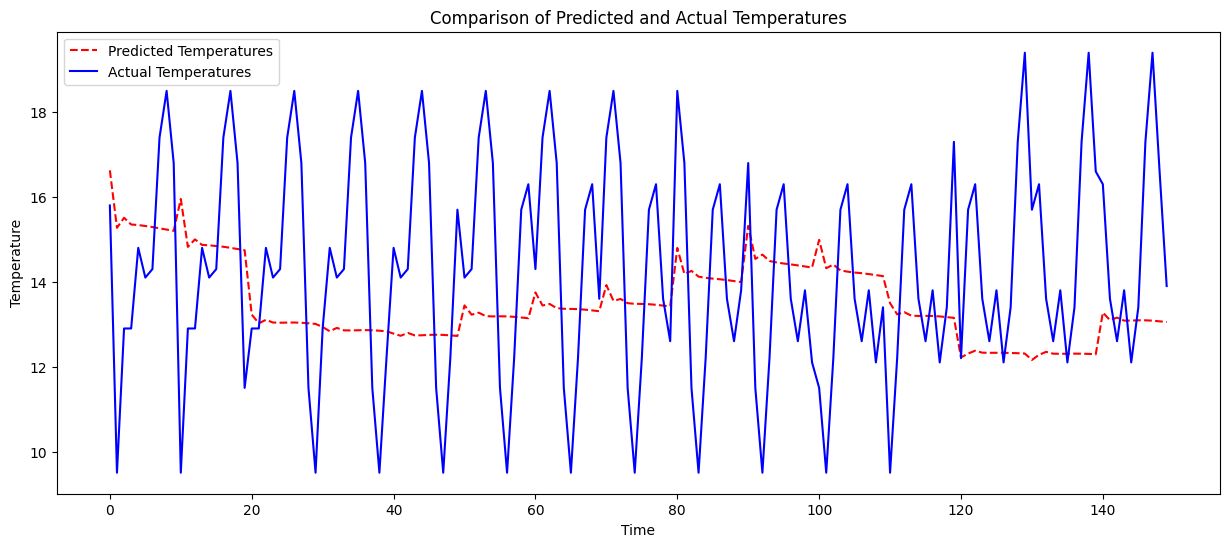

In [37]:
# Plot the first N predictions against the actual values for visual comparison
N = 15  # Number of points to plot
plt.figure(figsize=(15, 6))
plt.plot(predicted_temperatures_rescaled[:N, :, 0].flatten(), label="Predicted Temperatures", color='red', linestyle='--')
plt.plot(y_valid_rescaled[:N, :].flatten(), label="Actual Temperatures", color='blue')
plt.title("Comparison of Predicted and Actual Temperatures")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()